<a href="https://colab.research.google.com/github/YogitaGour/Amazon-Automation-Scripts/blob/main/notebooks/Copy_of_G24AIT2190.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 1 -MLOps NoteBook**

### Submitted by - Yogita Gour (G24AIT2190)


**Under Supervision
Of** - Dr. Hardik Jain

PG Diploma AI Trimester 2

**Indian Institute of Technology Jodhpur**

20 July 2025

# **Objective**
To clean and normalise the dataset and reflect on where issues in the ML lifecycle arise due to poor preprocessing.

# Diabetes Prediction using Machine Learning

This notebook contains my solution to Assignment 1, focusing on the preprocessing and model-building lifecycle using the Pima Indians Diabetes dataset.
Here We will load pima diabiets set and will do following menthod :
- Clean and preprocess the data
- Visualize key features before and after cleaning
- Train and evaluate two machine learning models:
  - Logistic Regression
  - Random Forest Classifier

The goal is to understand the relationship between various health factors and diabetes outcome. and also analyze data before preprocessing and after preprocessing




**Data Preprocessing**

 **1. Load Dataset/Data Collenction**

I used Try and except method for loading data set because after run local folder removed
  

*   First I upload csv file here in local folder, if it doesn't work
*   I have used gdown to Download CSV file from plublically share Google Drive Link (To get FILE_ID:)
From a shared URL like https://drive.google.com/file/d/FILE_ID/view?usp=sharing, extract the FILE_ID. because of versioning issue it doens't work sometime
* I have used Publically shared which found online





In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


#Download dataset
try:
    diabetes_data = pd.read_csv("/content/Assignment-data-diabetes.csv") #Download dataset from folder path
    print("File uploaded from Local path.")

except:
  try:
    !gdown --id 1cWZx8qkLj8ySblIfDSBUZClUKExX9sN0 -O pima_diabetes_data.csv # Download dataset from Google Drive
    diabetes_data = pd.read_csv('pima_diabetes_data.csv') #Publically share drive with this name
    print("file uploaded from google share link if local path not found")

  except:
    diabetes_data = pd.read_csv("https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv") #download dataset from this link
    print("File uploaded from URL.")

diabetes_data.head()



/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1cWZx8qkLj8ySblIfDSBUZClUKExX9sN0
To: /content/pima_diabetes_data.csv
100% 23.9k/23.9k [00:00<00:00, 54.6MB/s]
file uploaded from google share link if local path not found


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**2. Data Cleaning**



**Identify Missing/Inconsistent/Corrupted Values :**

Columns where 0s need to be checked and Count that column for verification

*   Insuline
*   Glucose
*   BMI
*   Skin Thickness
*   Pregnancy

In below code I also store a copy of original data for further comparison between Raw data and after cleaning data

In [ ]:
#Columns where 0s need to be checked and Count that column
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols_with_zeros:
    print(f"{col} zero count: {(diabetes_data[col] == 0).sum()}")
original_diabetes_data = diabetes_data.copy()

Glucose zero count: 5
BloodPressure zero count: 35
SkinThickness zero count: 227
Insulin zero count: 374
BMI zero count: 11


 **(a).Histogram plot Before cleaning**

> Add blockquote



Here you will see zero value in plot, we have checked data before preprocessing , Here you will notice , I have store copy of original data for comparison so I have used those data for Distrubution before replacing 0 to mean

 Distributions BEFORE replacing 0s:



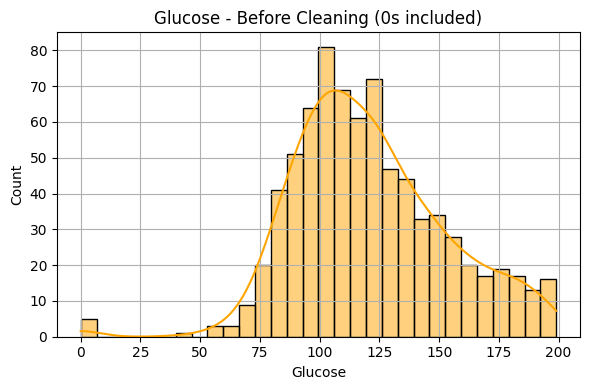

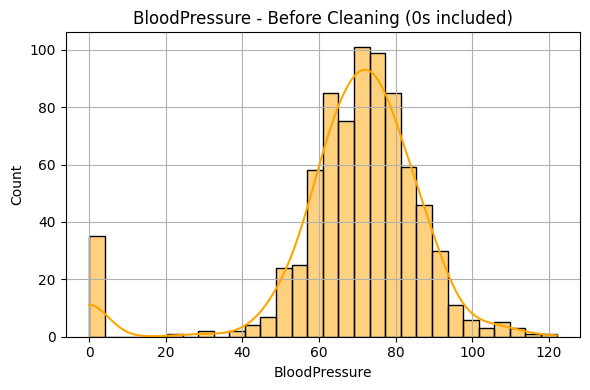

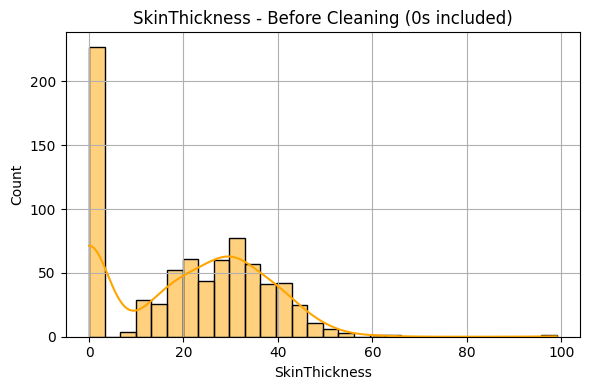

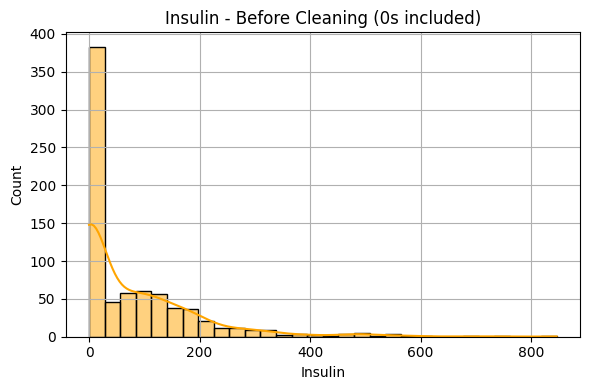

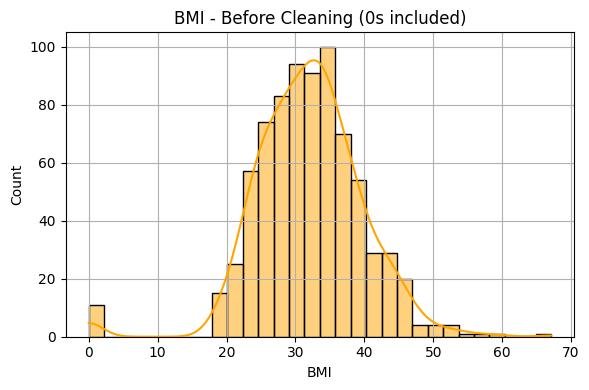

Before cleaning You can clearly see the plot where 0 count is showing in Glucose, Insulin, BloodPressure, Skin Thickness and you Notice unnatural spike at 0.


In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

#Plot a graph before cleaning
print(" Distributions BEFORE replacing 0s:\n")
for col in cols_with_zeros:
    plt.figure(figsize=(6, 4))
    sns.histplot(original_diabetes_data[col], bins=30, kde=True, color='orange')
    plt.title(f"{col} - Before Cleaning (0s included)")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
print( "Before cleaning You can clearly see the plot where 0 count is showing in Glucose, Insulin, BloodPressure, Skin Thickness and you Notice unnatural spike at 0." )



**3. Dtection and Replace missing value**

-Replace invalid zero values with the median of each column to improve data quality

In [ ]:
#Replace invalid zero values with the median of each column to improve data quality

for col in cols_with_zeros:
    zero_count = diabetes_data[col].value_counts().get(0, 0)
    if zero_count > 0:
        print(f"Replacing {zero_count} zeros in {col} with median value.")
        diabetes_data[col] = diabetes_data[col].replace(0, diabetes_data[col].median())

Replacing 5 zeros in Glucose with median value.
Replacing 35 zeros in BloodPressure with median value.
Replacing 227 zeros in SkinThickness with median value.
Replacing 374 zeros in Insulin with median value.
Replacing 11 zeros in BMI with median value.


**(b). Histogram plot After cleaning**

Replace 0s with median and. Check the new plot.

 Distributions AFTER cleaning (0s replaced with median):



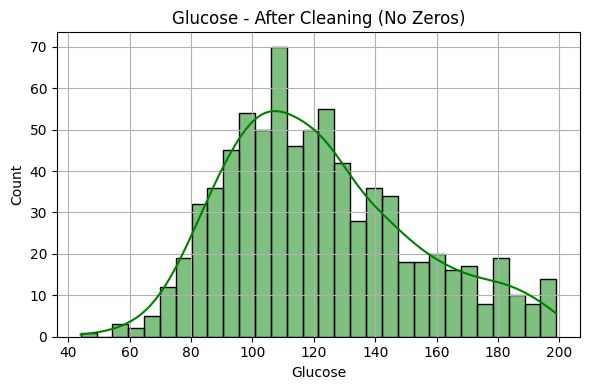

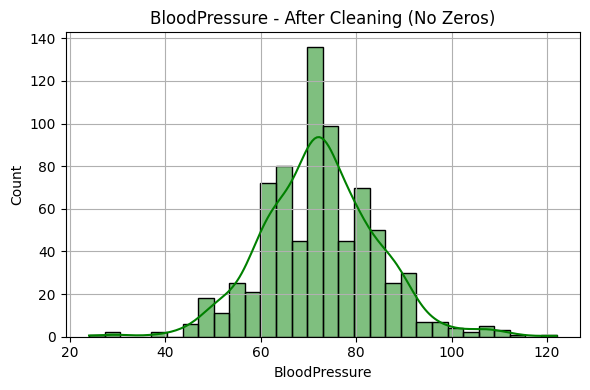

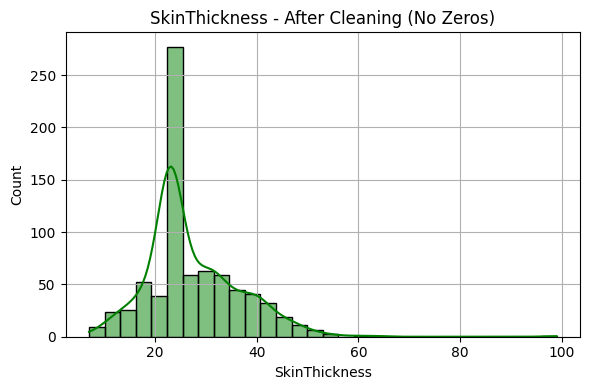

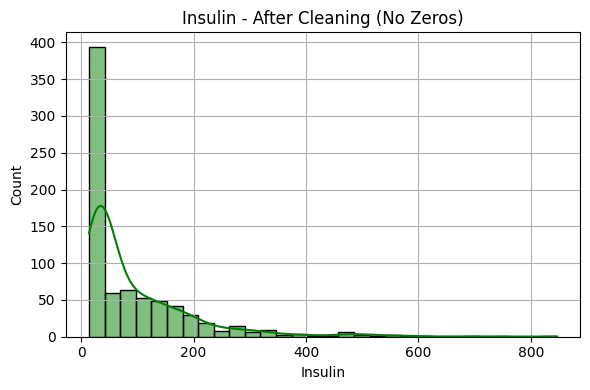

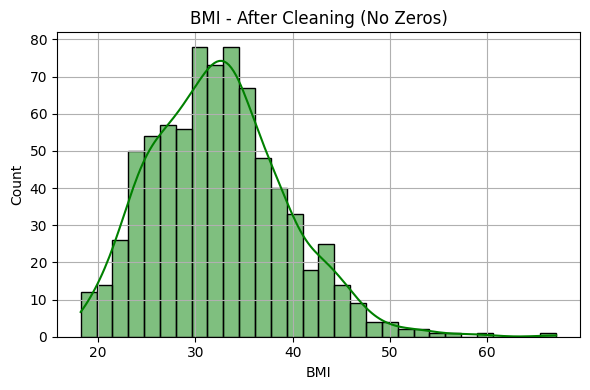

In [ ]:
# New plot graph after data cleaning
print(" Distributions AFTER cleaning (0s replaced with median):\n")
for col in cols_with_zeros:
    plt.figure(figsize=(6, 4))
    sns.histplot(diabetes_data[col], bins=30, kde=True, color='green')
    plt.title(f"{col} - After Cleaning (No Zeros)")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

**Data Distribution observation Before vs After Cleaning**

We observed that some features like Glucose and BMI had invalid 0 values, which were replaced with the median of that column. The histograms below clearly show improved, more realistic distributions after cleaning.


**4. Normalization /Standarization**

*  Split feature and label
*   Split Both data before Cleaning and After cleaning








In [ ]:
# Drop the target column to separate features and label
X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']

# Prepare raw data (before replacing 0s)
X_raw = original_diabetes_data.drop('Outcome', axis=1)
y_raw = original_diabetes_data['Outcome']


 >**Normalize Using StandardScaler**
- Normalize Both data before Cleaning and After cleaning
-Here  we create Scaler Object , fit and transform the feature




In [ ]:
from sklearn.preprocessing import StandardScaler

# Create a scaler object after cleaning
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_scaled.head()

# Create a scaler object Before cleaning
scaler_raw = StandardScaler()
X_raw_scaled = pd.DataFrame(scaler_raw.fit_transform(X_raw), columns=X_raw.columns)
X_raw_scaled.head()



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


 **Normalization feature**

 Here you will notice , we used StandardScaler to scale all the numerical features, so that they have a mean of 0 and a standard deviation of 1. It helps the data more balanced and helps the model learn better, especially for Logistic Regression that depend on distances and gradients.



**5. Train Test Split of raw and preprocess data**
- Spliting data into 80% training and 20% more accuracy
- Here we use `random_state=42` it wil ensures that the same random numbers are generated each time the code is run.


In [ ]:
from sklearn.model_selection import train_test_split
#After cleaning ,Split into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Before cleaning split data into 80 % traing and 20% testing

Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_raw_scaled, y_raw, test_size=0.2, random_state=42)

**6. Train Logistic Regression on raw and preprocess data**

In [ ]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression After cleaning
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Logistic Regression before cleaning
lr_raw = LogisticRegression()
lr_raw.fit(Xr_train, yr_train)
y_pred_lr_raw = lr_raw.predict(Xr_test)



**7. *Train* Random Forest of raw and preprocess data**

While traning and splitting data we will randomly initialize data and paramete

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest after cleaning
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Random Forest before cleaning
rf_raw = RandomForestClassifier(random_state=42) #Train
rf_raw.fit(Xr_train, yr_train)
y_pred_rf_raw = rf_raw.predict(Xr_test) #predictt

**8. Evalute Both Module -Random Forest and Logistic Regression in Both data set**


*   Logistic Regression Performance of Preprocessed Data and Raw data
*   Random Forest Performance of Preprocessed Data and Raw data







In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


print("\033[1m=== MODEL PERFORMANCE After PREPROCESSING (without 0) ===\033[0m")
# Logistic Regression
print(" Logistic Regression Performance of Preprocessed Data:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\n Logistic Regression Confusion Matrix Of cleaned data:\n", confusion_matrix(y_test, y_pred_lr))
print("\n Logistic Regression Classification Report of preprocessed data:\n", classification_report(y_test, y_pred_lr))

# Random Forest
print("\n Random Forest Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\n Random Forest Classification Report of preprocessed data:\n",classification_report(y_test, y_pred_rf))
print("\n Random Forest Confusion Matrix of cleaned data:\n",confusion_matrix(y_test, y_pred_rf))


#Before Cleaning result/ Raw daya
print("\n\n\033[1m=== MODEL PERFORMANCE before PREPROCESSING (with 0s present) ===\033[0m")

# Logistic regression
print("Logistic Regression (Raw Data/before cleaning):")
print("Accuracy of   :", accuracy_score(yr_test, y_pred_lr_raw))
print("\n Logitsic Regression Confusion Matrix of Raw data:\n",confusion_matrix(yr_test, y_pred_lr_raw))
print("\n Logistic Regression Classfication Report of Raw data:\n",classification_report(yr_test, y_pred_lr_raw))
#Random forest
print("Random Forest (Raw Data/before cleaning):")
print("Accuracy:", accuracy_score(yr_test, y_pred_rf_raw))
print("\n Random Forest Confusion Matrix of Raw data:\n",confusion_matrix(yr_test, y_pred_rf_raw))
print("\n Random Forest Classfication Report of Raw data:\n",classification_report(yr_test, y_pred_rf_raw))




=== MODEL PERFORMANCE After PREPROCESSING (without 0) ===
 Logistic Regression Performance of Preprocessed Data:
Accuracy: 0.7662337662337663

 Logistic Regression Confusion Matrix Of cleaned data:
 [[82 17]
 [19 36]]

 Logistic Regression Classification Report of preprocessed data:
               precision    recall  f1-score   support

           0       0.81      0.83      0.82        99
           1       0.68      0.65      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.77       154


 Random Forest Performance:
Accuracy: 0.7597402597402597

 Random Forest Classification Report of preprocessed data:
               precision    recall  f1-score   support

           0       0.82      0.81      0.81        99
           1       0.66      0.67      0.67        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       1


**Observation on  Random Forest and Logistic Regression in raw and clean dataset**

Here in above result you clearly notice Cleaning the data slightly improved Logistic Regression's performance, especially in precision and F1-score. It's now a bit more confident and balanced.

Random Forest clearly benefited from cleaning the data, performing better across all metrics. It became more effective in catching actual positives (higher recall) and being more reliable overall. so In short-

* Preprocessing/cleaning the data made both models perform better.

* Cleaning the data  improved Logistic Regression's performance overall, especially in precision and F1-score.

* Random Forest, which was weaker before, showed a bigger improvement after cleaning.Here you will notice now it's more effective in catching actual positives (higher recall) and gave more balanced result overall.

* After cleaning, both models became more balanced, but Logistic Regression still slightly edges out in simplicity and precision, while Random Forest is a bit better in recall.




**9. Plot a Graph Before Vs After Data cleaning of Random Forest and Logistic Regression**

*  Here we will check Logistic Regression Performance of Preprocessed Data and Raw data
*   Here we will check Random Forest Performance of Preprocessed Data and Raw data


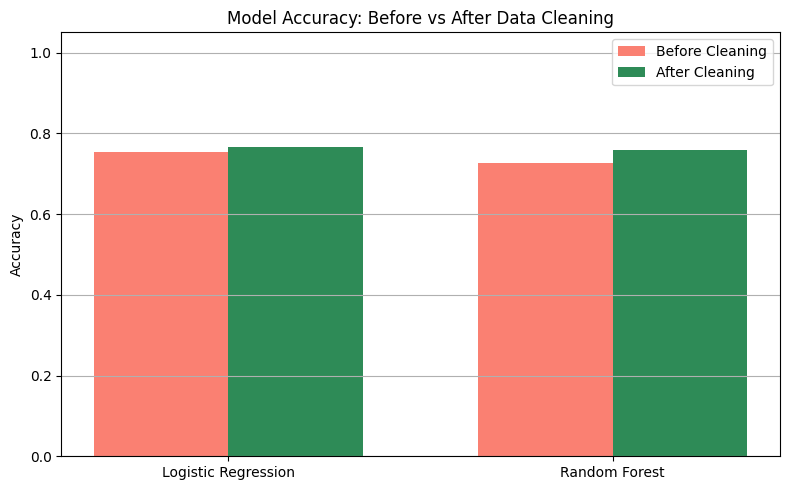

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Accuracy before cleaning (Logistic Regression and Rendom Forest)
acc_lr_u = accuracy_score(yr_test, y_pred_lr_raw)
acc_rf_u = accuracy_score(yr_test, y_pred_rf_raw)

# Accuracy After cleaning (Logistic Regression and Rendom Forest)
acc_lr = accuracy_score(y_test, y_pred_lr)
acc_rf = accuracy_score(y_test, y_pred_rf)

models = ['Logistic Regression', 'Random Forest']
before_cleaning = [acc_lr_u, acc_rf_u]
after_cleaning = [acc_lr, acc_rf]

x = np.arange(len(models))
width = 0.35

plt.figure(figsize=(8, 5))
plt.bar(x - width/2, before_cleaning, width, label='Before Cleaning', color='salmon')
plt.bar(x + width/2, after_cleaning, width, label='After Cleaning', color='seagreen')

plt.ylabel('Accuracy')
plt.title('Model Accuracy: Before vs After Data Cleaning')
plt.xticks(x, models)
plt.ylim(0, 1.05)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


**Impact of Data Cleaning on Model Accuracy**

The bar chart above compares model accuracy before and after data cleaning. Both Logistic Regression and Random Forest show improved performance after replacing invalid 0 values and standardizing the data. This bar graph  highlights how preprocessing plays a critical role in improving the model's ability to learn and generalize data.



**10. Evalute Logistic regression and Random forest Matrics of Preprocessed data**







In [ ]:

from sklearn.metrics import precision_score, recall_score, f1_score

# Metrics for Logistic Regression
acc_lr = accuracy_score(y_test, y_pred_lr)
prec_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

print("Logistic Regression Metrics of preprocessed data:")
print("Accuracy:", acc_lr)
print("Precision:", prec_lr)
print("Recall:", recall_lr)
print("F1-Score:", f1_lr)

# Metrics for Random Forest
acc_rf = accuracy_score(y_test, y_pred_rf)
prec_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print("\nRandom Forest Metrics of preprocessed cleaned data:")
print("Accuracy:", acc_rf)
print("Precision:", prec_rf)
print("Recall:", recall_rf)
print("F1-Score:", f1_rf)




Logistic Regression Metrics of preprocessed data:
Accuracy: 0.7662337662337663
Precision: 0.6792452830188679
Recall: 0.6545454545454545
F1-Score: 0.6666666666666666

Random Forest Metrics of preprocessed cleaned data:
Accuracy: 0.7597402597402597
Precision: 0.6607142857142857
Recall: 0.6727272727272727
F1-Score: 0.6666666666666666


**Observation between Logitic Regresion & Random Forest on cleaned data**

Here we observed Logistic Regression and Random forest module on cleaned/ preprocessed data

*   Logistic Regression and Random Forest gave very similar results after cleaning the data.

*   Logistic Regression had slightly better accuracy and precision, meaning it made correct predictions a bit more often and gave fewer false positives.

*   Random Forest had a slightly better recall, meaning it was a bit better at finding all the actual positive cases (like catching all diabetic patients if this is a medical dataset).

*   F1-Score, which balances both precision and recall, was exactly the same (0.66) for both models.List item






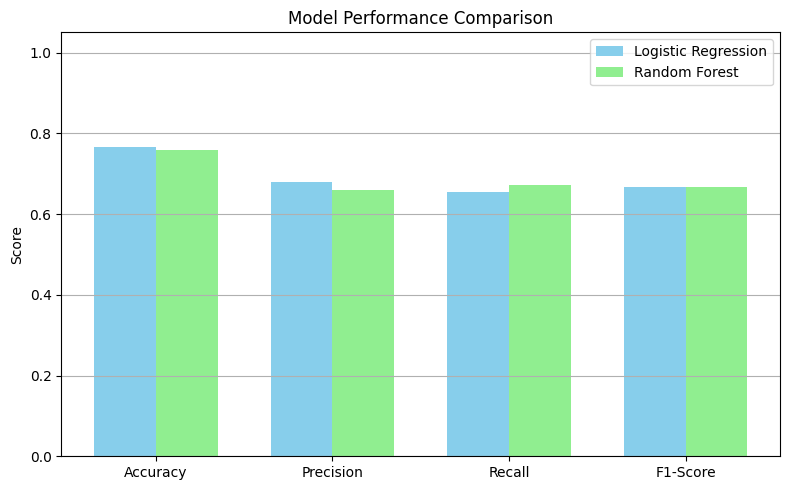

In [ ]:
# Prepare data for plotting
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
logistic_values = [acc_lr, prec_lr, recall_lr, f1_lr]
rf_values = [acc_rf, prec_rf, recall_rf, f1_rf]

x = np.arange(len(metrics))  # the label locations
width = 0.35  # the width of the bars

plt.figure(figsize=(8, 5))
plt.bar(x - width/2, logistic_values, width, label='Logistic Regression', color='skyblue')
plt.bar(x + width/2, rf_values, width, label='Random Forest', color='lightgreen')

plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.xticks(x, metrics)
plt.ylim(0, 1.05)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


## **Model Evaluation**

We trained and tested two models: Logistic Regression and Random Forest. above are the accuracy and classification reports Graph

-Logistic Regression is easy to understand and explain, but it might not work well if the data is not clearly separated in a straight line.

-On the other hand, Random Forest is a group of decision trees that usually gives better results, especially when the data is more complex or messy, like in real-world situations.

We observed that preprocessing (like cleaning and scaling) improved both model performance and interpretability.

### **11.Data Preprocessing with Zero Replacement + Outlier Removal**

In above method and graph, you will notice preprocessed (replace 0 with mean) data works better than raw data, Here we will try to remove outlier along with 0 replacement

### Step 1: Replace 0s with Mean

In the dataset, 0 values are not valid and so we replaced with the mean of the respective column: ( Glucose, BloodPressure , SkinThickness ,Insulin  ,BMI) As we do above

This step ensures that the model does not get biased due to invalid zeros.


###  Step 2: Remove Outliers Using IQR Method

We remove outliers from the following columns using the Interquartile Range (IQR) method: ( Glucose, BloodPressure , SkinThickness ,Insulin  ,BMI)


This helps improve the robustness of the model by removing extreme, unrealistic values.

---

### Step 3: Train Random Forest Classifier

We train a `RandomForestClassifier` using an 80-20 train-test split. After training, we evaluate it using standard classification metrics.
___

Here we also Print all row count after preprocessed with mean, before prepreocess and including remove Outliers Using IQR Method
How many rows will remove




In [ ]:
df= diabetes_data.copy()

# Step 1: Replace 0s with mean (for specific columns)
for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    df[col] = df[col].replace(0, df[col].mean())

# Step 2: Remove outliers using IQR method
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

for col in ['Glucose', 'BMI', 'Age', 'SkinThickness', 'BloodPressure', 'Pregnancies', 'Insulin']:
    df = remove_outliers_iqr(df, col)


X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

print("\nOriginal rows:", diabetes_data.shape[0])
print("Rows after cleaning:", df.shape[0])
print("Dropped rows:", diabetes_data.shape[0] - df.shape[0])






Accuracy: 0.7862595419847328
Precision: 0.7096774193548387
Recall: 0.5365853658536586
F1 Score: 0.6111111111111112

Original rows: 768
Rows after cleaning: 654
Dropped rows: 114




##  Conclusion

We tried different methods to clean and prepare the Pima Diabetes Dataset. First, we replaced the 0 values in important columns (like Glucose, BMI, etc.) with their mean. Then, we also tried removing outliers using the IQR method., and also observe **114** rows removed after removing outlier.

###  Models Compared:

1. **Logistic Regression** with only mean replacement.
2. **Random Forest** with only mean replacement.
3. **Random Forest** with both mean replacement and outlier removal.

###  Results:

| Model                                  | Accuracy | Precision | Recall | F1-Score |
|----------------------------------------|----------|-----------|--------|----------|
| Logistic Regression (mean only)        | 0.7662   | 0.6792    | 0.6545 | 0.6667   |
| Random Forest (mean only)              | 0.7597   | 0.6607    | 0.6727 | 0.6667   |
| Random Forest (mean + outlier removal) | **0.7862** | **0.7097** | 0.5366 | 0.6111   |

###  What We Learned:

- Accuracy and precision improved after removing outliers.
- But recall decreased, which means the model is catching fewer actual diabetic cases.
- This happened because we dropped 114 rows as outliers, and some useful data might have been removed.

### Final Suggestion:

- If we want to catch more diabetic cases (high recall), then using **mean replacement only** is better.
- If we want better overall performance and cleaner data, then **removing outliers + replacing 0s** works well.
-In This case , logistic regression works better on preprocessed data where invalid zero replaced with mean value



## **Lifecycle Reflection: The Importance of Preprocessing in ML**

### Q1: What would go wrong in the ML lifecycle if preprocessing is skipped?

If we skip preprocessing, the model may learn from **incomplete, inconsistent, or misleading data**. In this dataset, several features like Glucose and BMI had `0` values, which are not realistic. If we train a model without fixing these, it may:
- Learn incorrect patterns
- Give poor accuracy
- Misclassify patients (which can be dangerous in healthcare)
- Be less generalizable to new data

Also, without normalization, features with large values (like Glucose) will dominate smaller ones (like DiabetesPedigreeFunction), causing **bias in model learning**.

---

### Q2: Can this problem be identified or prevented using normal programming practices?

**Partially yes**, but not completely.

Normal programming (like writing Python scripts) may catch **technical errors** (e.g., missing values or wrong types) using print statements, `.describe()`, `.info()`, or `assert` checks.

But **ML-specific problems** like:
- Invalid but technically “allowed” values (e.g., BMI = 0)
- Feature scaling issues
- Imbalanced distributions

…won’t be caught unless we visualize, understand domain knowledge, and do proper data exploration — which are not part of regular software coding practices.

---

### Q3: Personal Example from This Assignment

While working on this, I initially assumed 0 values were okay. But after visualizing features like Glucose and BloodPressure, I noticed **strange spikes at 0**. Here you can see in the plot.This made me realize they were actually **missing values**, not valid measurements.

 Even though Random Forest is usually expected to perform better, in this case, both models performed almost equally well after preprocessing. So, if you want a simple and easy-to-explain model, Logistic Regression is a good choice here. But if you want to capture slightly more positive cases, Random Forest is a bit better at that.
 In this data set  Logistic Regression model performed **much better** after scaling and cleaning — which wouldn’t have happened without doing preprocessing first. This showed me how **data quality directly affects model accuracy**.
